In [49]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import timedelta
from scipy import signal

In [50]:
Player = 9
Game = 2
df_Player = pd.read_csv('matrix_Player_' + str(Player) + '_game_' + str(Game) + '.csv')
df_Player.columns = ['frAcc','frRoAcc','frDispl','frRoAng','frSpeed','timeLine','frameRotationalSpeedX','frameRotationalSpeedY','frameRotationalSpeedZ','wheelRotationalSpeedX','wheelRotationalSpeedY','wheelRotationalSpeedZ','frRoSpeed']
df_Action = pd.read_csv('Ned_DUI_Game_' + str(Game) + '.csv')
df_Player

,frAcc,frRoAcc,frDispl,frRoAng,frSpeed,timeLine,frameRotationalSpeedX,frameRotationalSpeedY,frameRotationalSpeedZ,wheelRotationalSpeedX,wheelRotationalSpeedY,wheelRotationalSpeedZ,frRoSpeed
0,0.000000,0.0,0.0,0.00000,0.000000,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
1,0.000000,0.0,0.0,0.00000,0.000000,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
2,0.000000,0.0,0.0,0.00000,0.000000,0.03,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
3,0.000000,0.0,0.0,0.00000,0.000000,0.04,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
4,0.000000,0.0,0.0,0.00000,0.000000,0.05,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
754220,-0.030424,4981.9,6585.3,-0.11980,-0.001860,7542.20,0.97222,2.4578,-0.98778,-0.000000,4.690,2.730,0.25656
754221,0.062668,4981.9,6585.3,-0.11723,-0.002164,7542.20,0.91000,2.5480,-1.05000,-0.056000,4.494,2.597,-1.68370
754222,0.019899,4981.9,6585.2,-0.13407,-0.001537,7542.20,0.92400,2.6320,-1.05000,0.070000,4.620,2.660,NaN
754223,NaN,NaN,NaN,NaN,NaN,NaN,0.96444,2.5200,-1.01890,0.070000,4.620,2.660,NaN


<ipython-input-51-1d62b9bc54fb>:18: RuntimeWarning: invalid value encountered in true_divide
  Conv1 = filtered_FrameRotationspeed / filtered_WheelRotationspeed
<ipython-input-51-1d62b9bc54fb>:19: RuntimeWarning: invalid value encountered in true_divide
  Conv2 = (abs(filtered_FrameRotationspeed)+abs(filtered_WheelRotationspeed))/filtered_WheelRotationspeed


[997.01, 1019.0, 1041.5, 1062.5, 1078.0, 1086.0, 1093.5, 1105.5, 1138.0, 1161.0, 1181.5, 1201.0, 1232.5, 1248.5, 1257.0, 1427.5, 1485.5, 1511.5, 1538.0, 1566.0, 1593.0, 1626.5, 1659.5, 1676.0, 1734.0, 1832.0, 1912.0, 2216.5, 2224.5, 2235.5, 2433.5, 2465.5, 2490.0, 2558.0, 2598.0, 2631.0, 2647.0, 2671.5, 2684.0, 2786.0, 2800.0, 2850.0, 2873.0, 2888.5, 2940.0, 2956.5, 3004.5, 3025.5, 3049.0, 3074.0, 3093.5, 3118.5, 3137.5, 3156.0, 3256.0, 3276.0, 3329.5, 3372.0, 3506.5, 3530.0, 3555.5, 3602.5, 3628.0, 3654.0, 3685.0, 3703.5, 5040.0, 5053.5, 5080.5, 5095.0, 5135.5, 5146.5, 5177.0, 5207.0, 5324.0, 5345.5, 5369.0, 5400.5, 5411.0, 5434.0, 5462.0, 5510.5, 5594.5, 5621.0, 5704.0, 5745.5, 5842.5, 5895.0, 5927.5, 5955.5, 5974.5, 5993.0, 6044.5, 6059.5, 6076.5, 6897.0, 6912.5, 6923.0, 6950.5, 6963.0, 6981.0, 6998.0, 7051.0, 7186.5, 7206.0, 7225.5, 7249.0, 7281.0] [1008.0, 1041.0, 1047.0, 1074.0, 1083.5, 1093.0, 1103.0, 1121.0, 1148.5, 1181.0, 1186.5, 1219.5, 1246.0, 1254.0, 1262.0, 1433.5, 1490.5

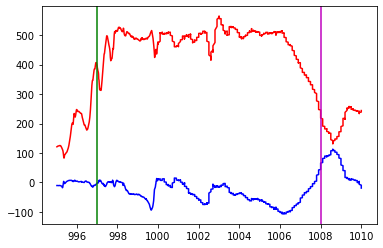

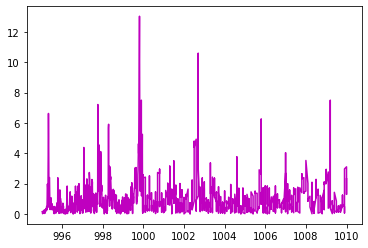

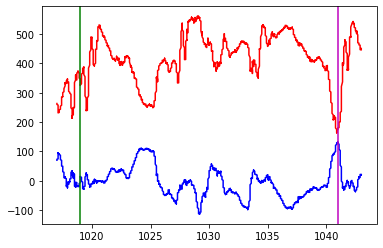

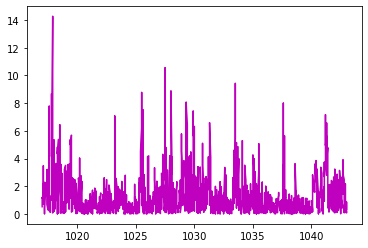

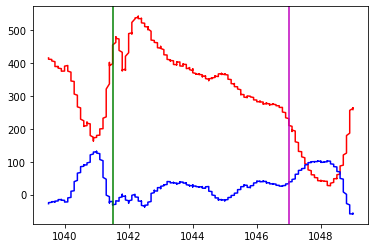

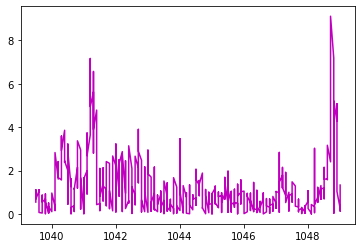

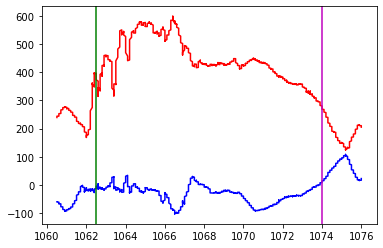

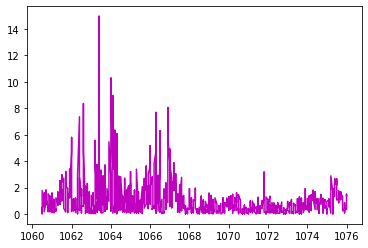

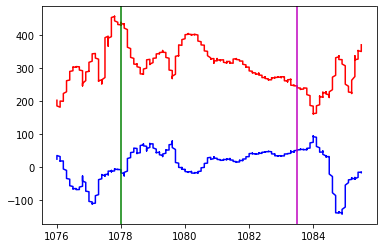

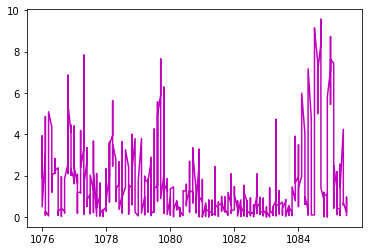

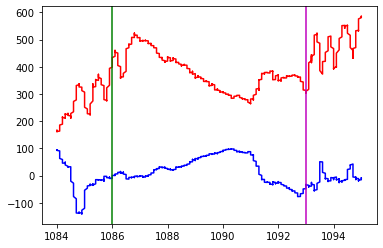

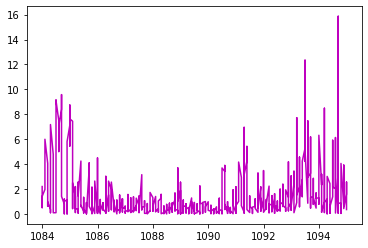

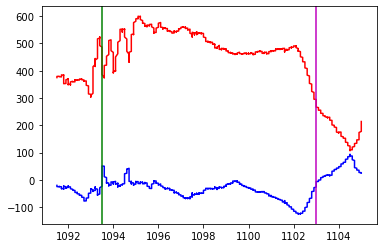

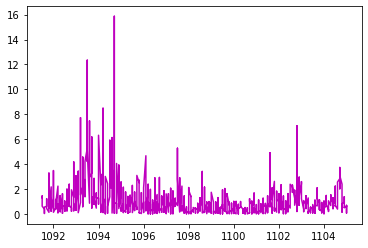

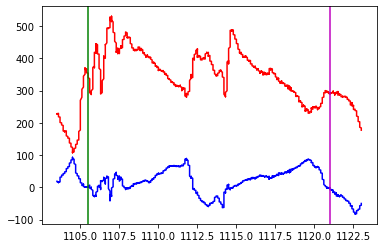

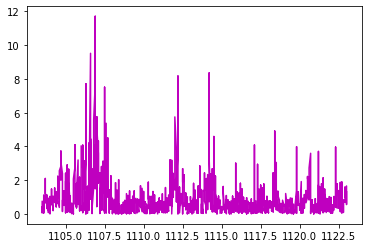

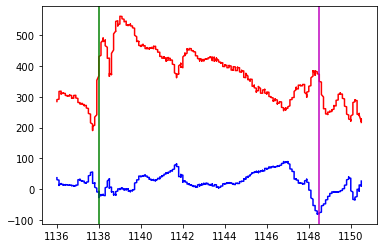

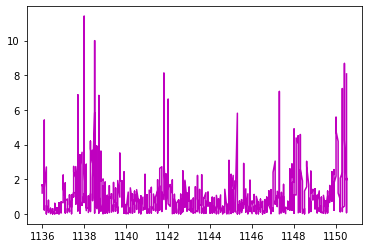

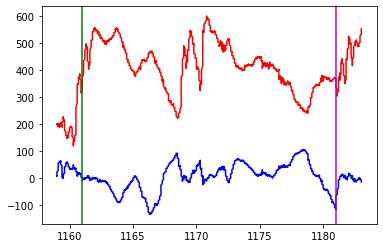

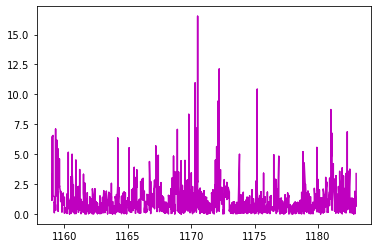

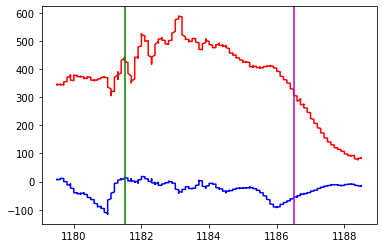

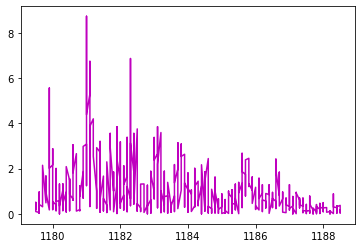

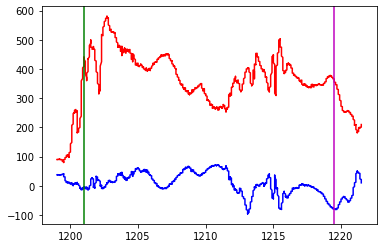

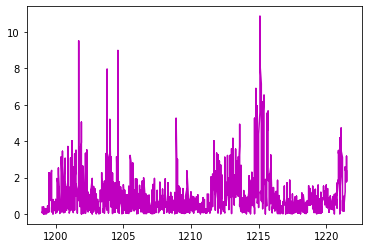

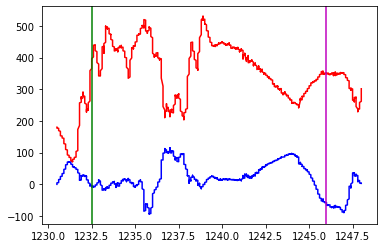

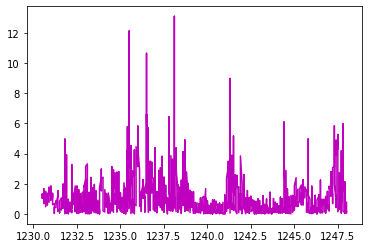

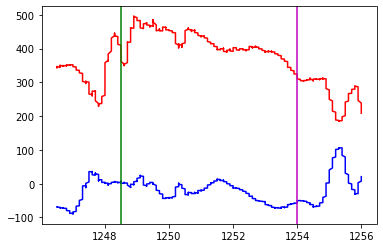

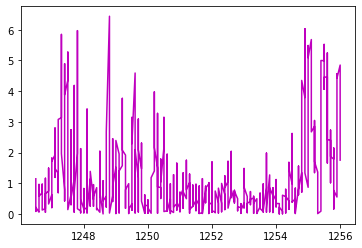

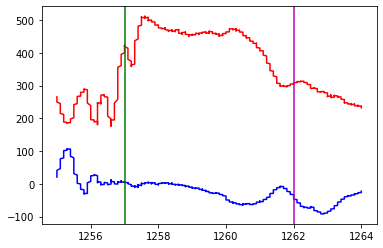

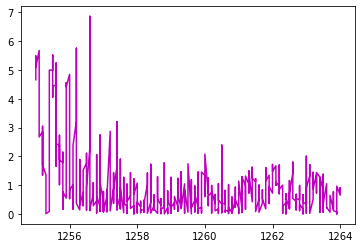

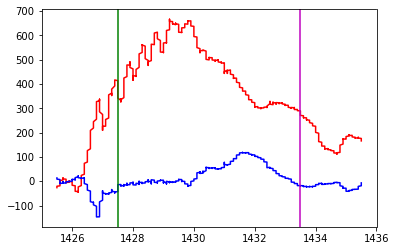

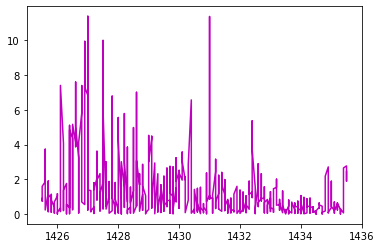

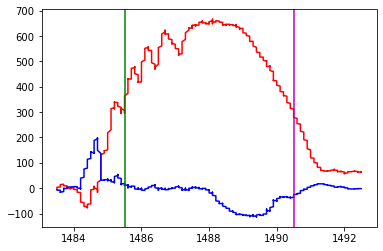

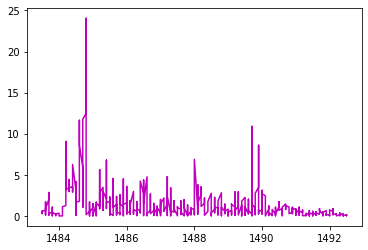

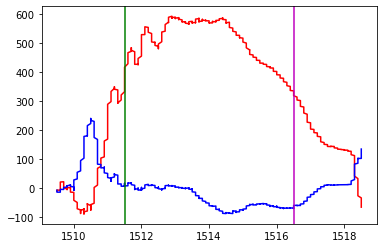

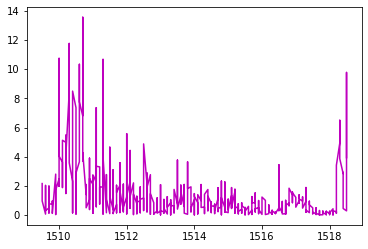

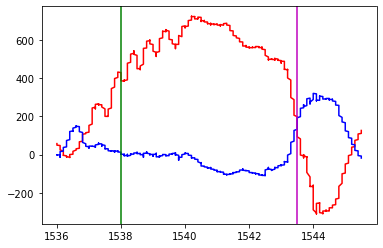

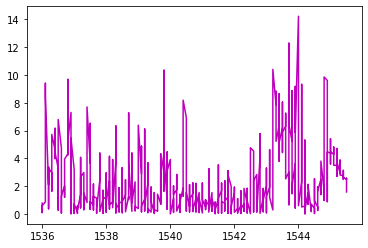

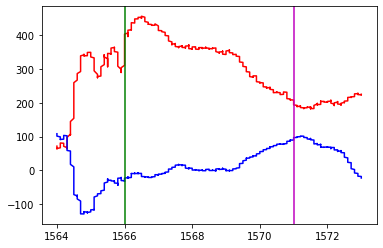

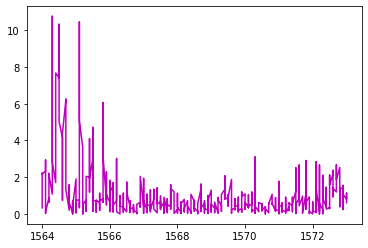

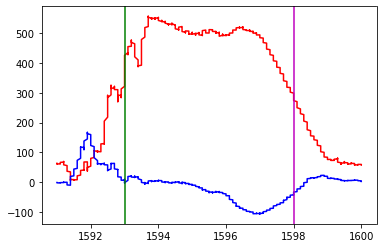

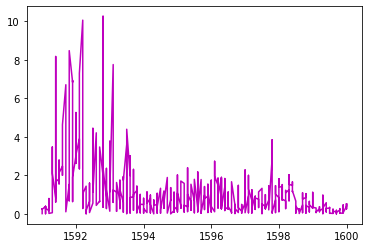

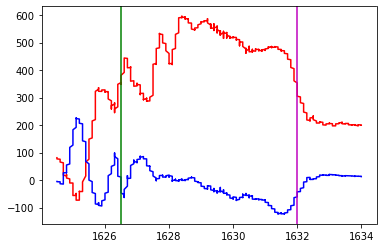

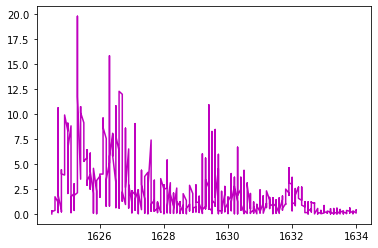

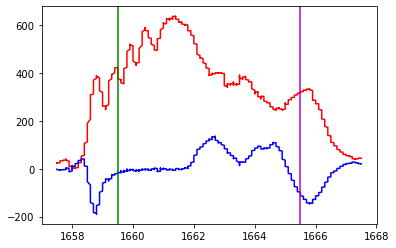

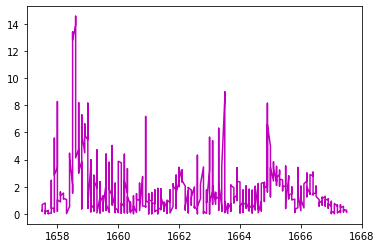

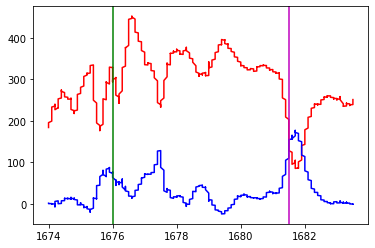

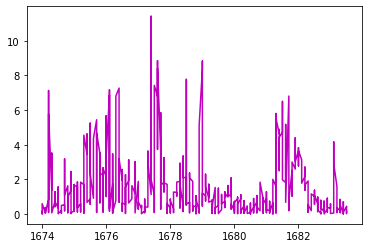

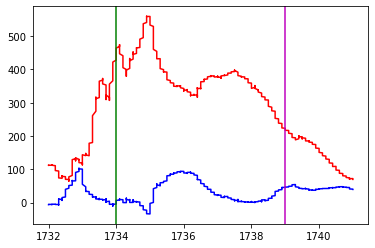

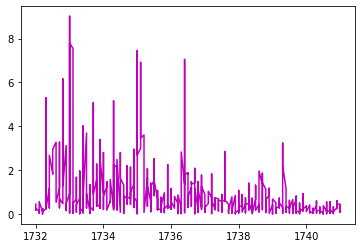

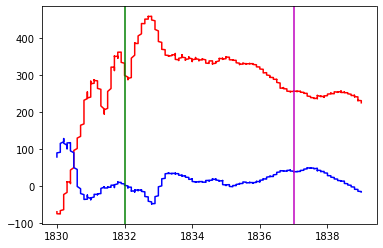

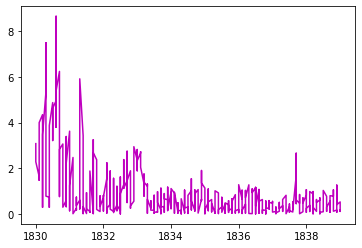

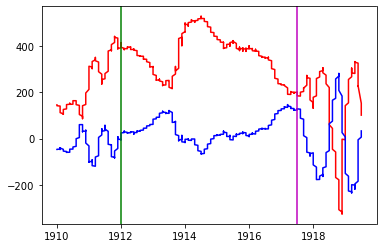

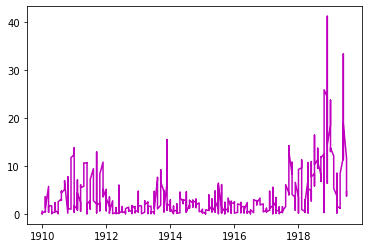

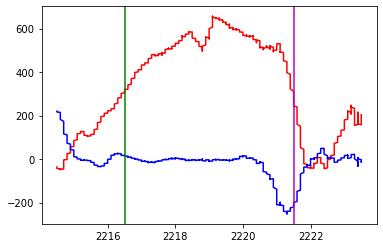

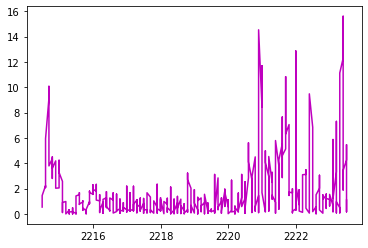

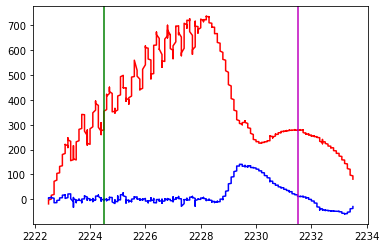

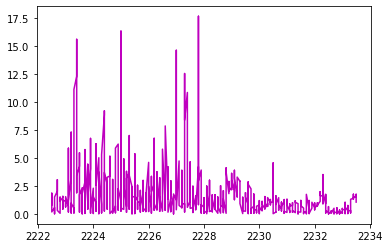

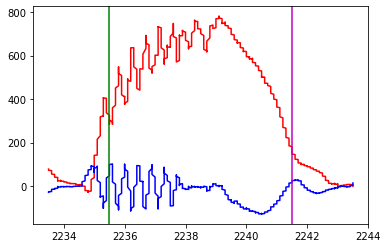

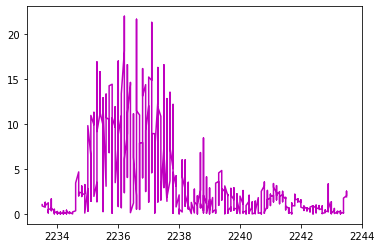

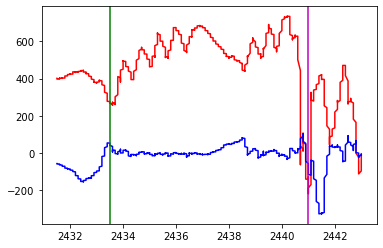

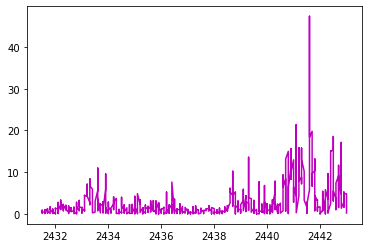

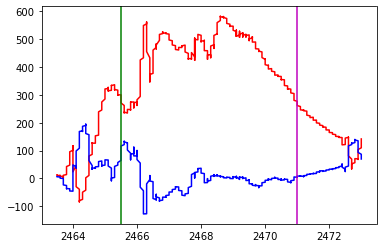

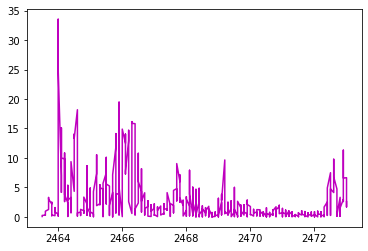

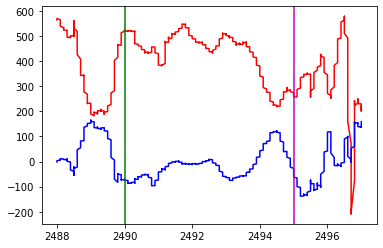

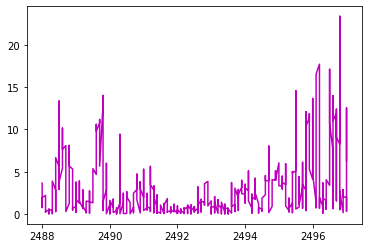

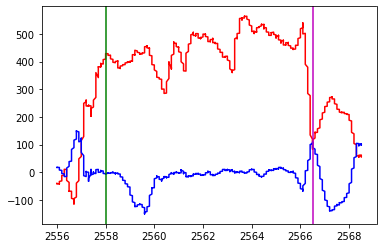

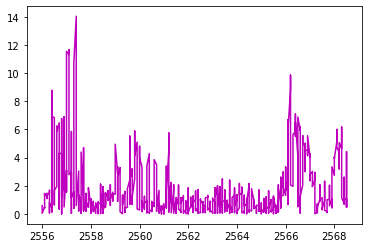

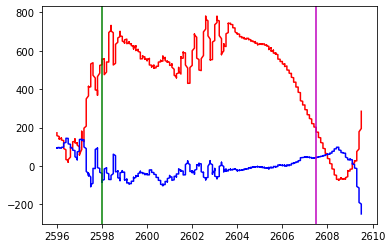

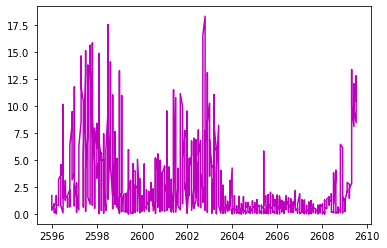

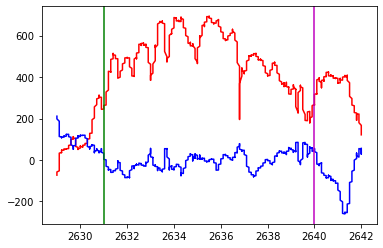

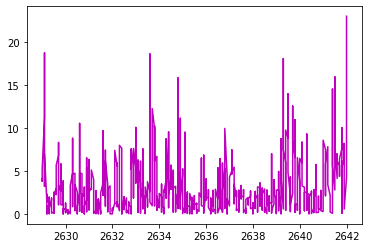

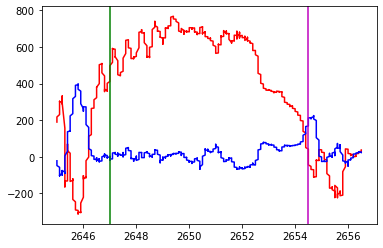

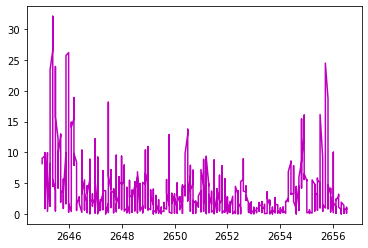

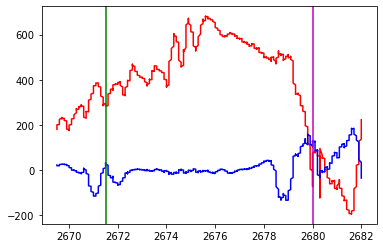

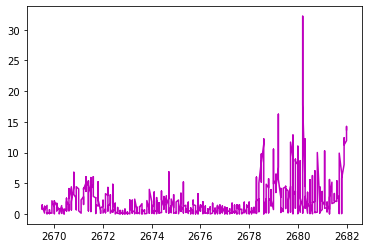

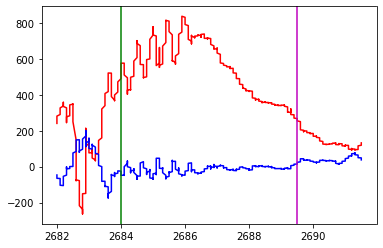

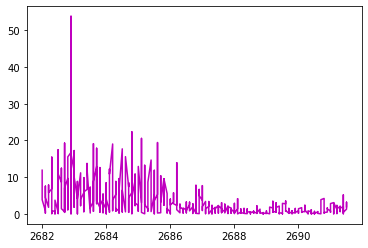

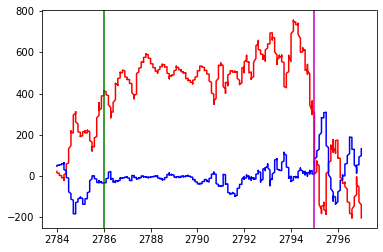

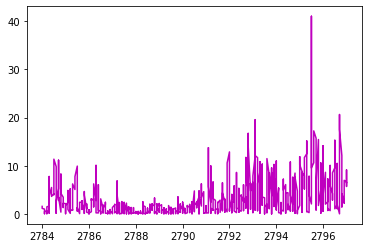

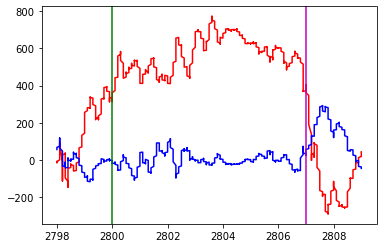

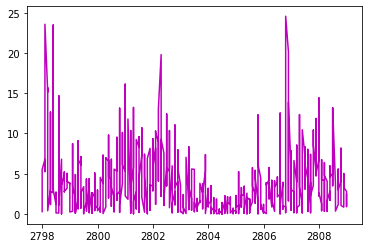

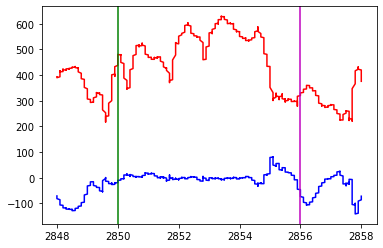

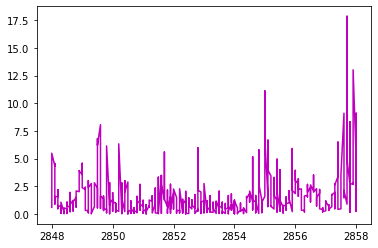

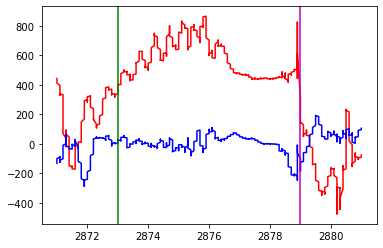

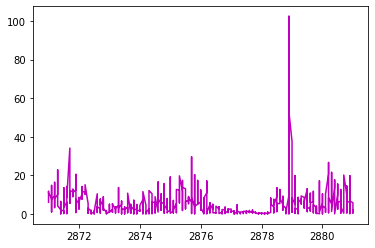

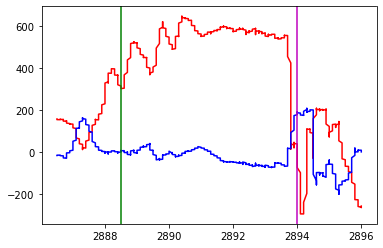

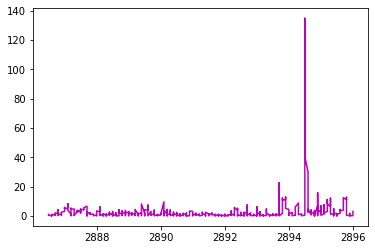

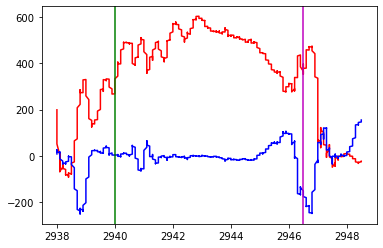

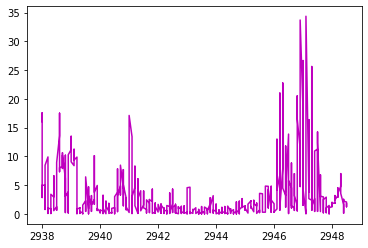

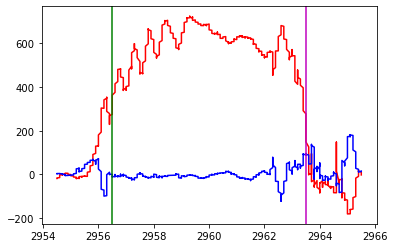

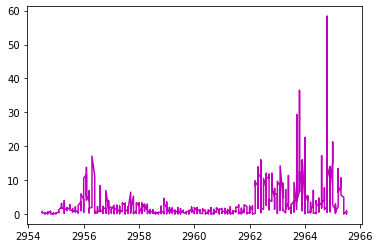

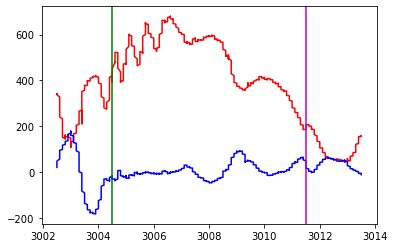

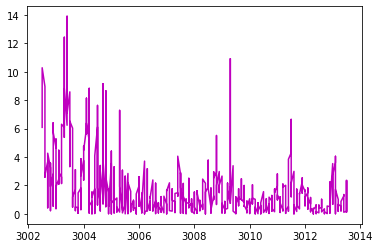

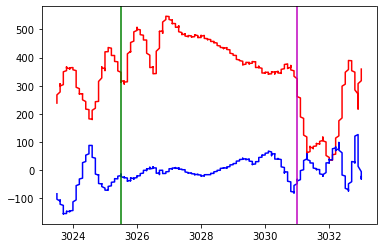

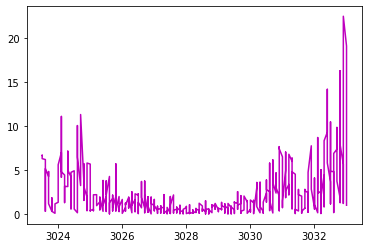

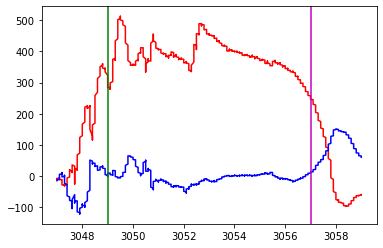

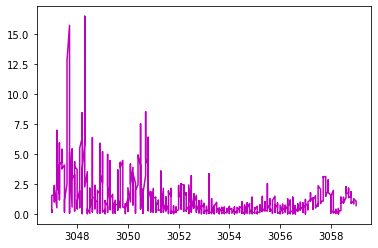

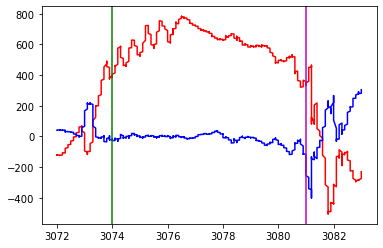

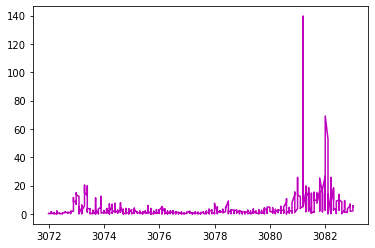

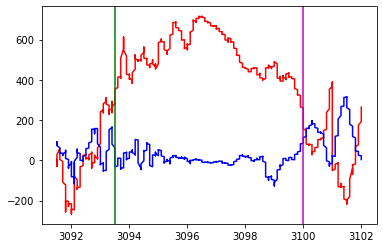

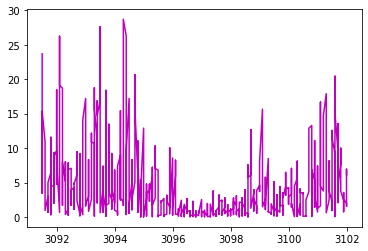

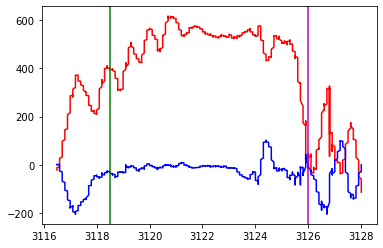

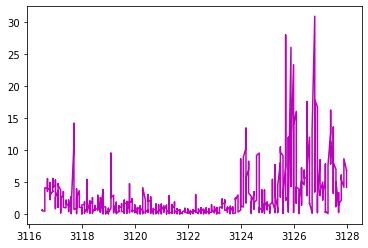

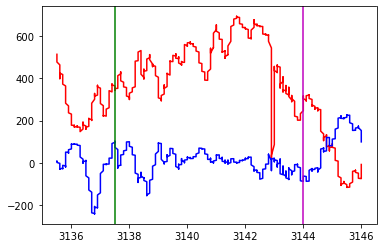

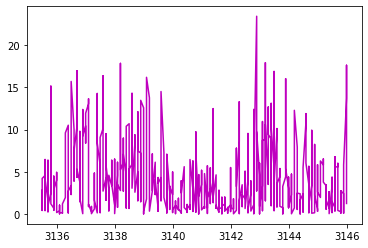

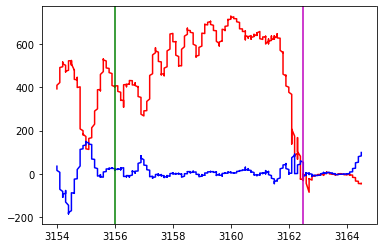

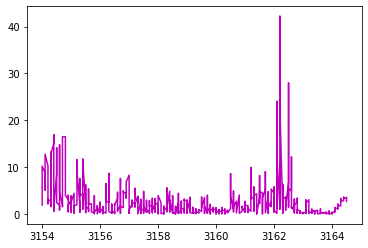

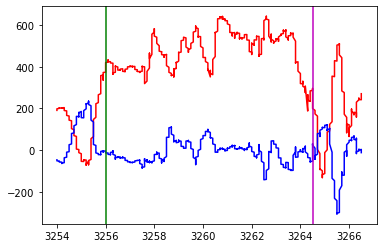

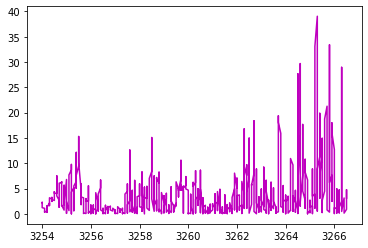

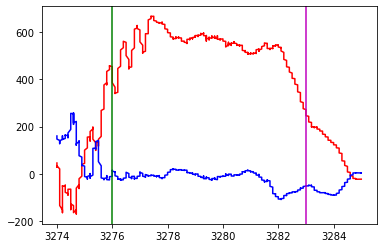

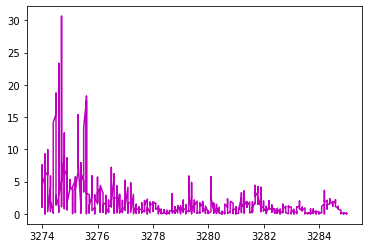

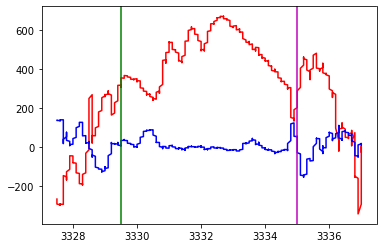

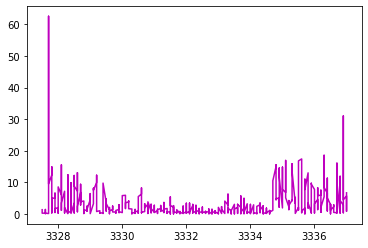

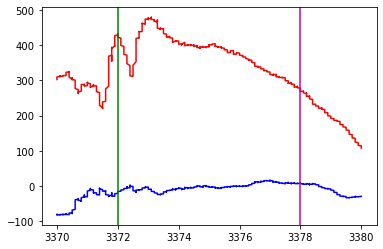

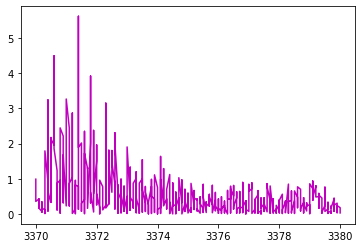

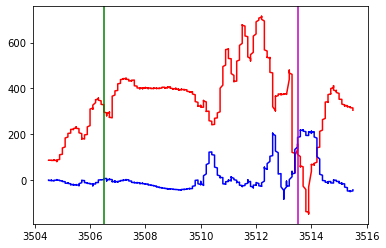

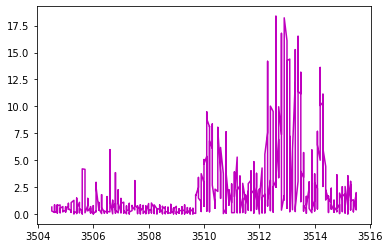

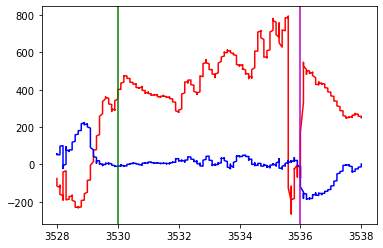

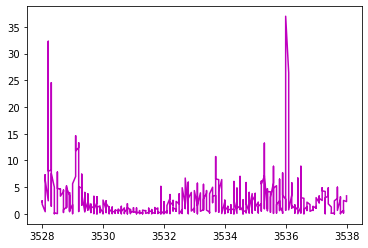

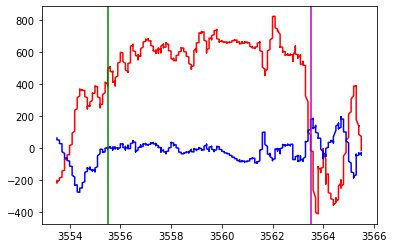

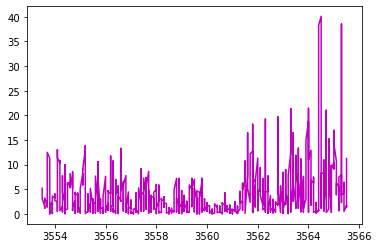

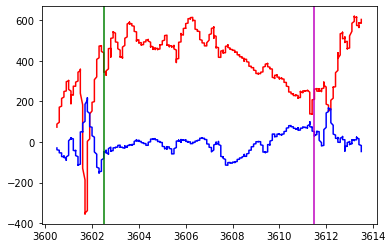

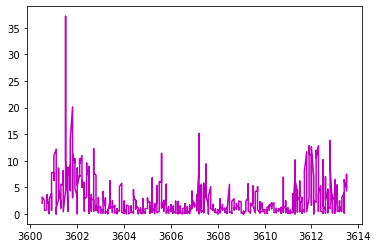

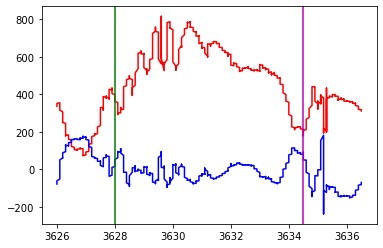

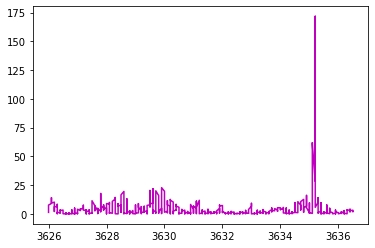

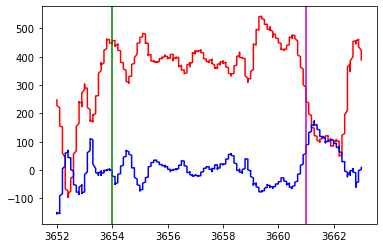

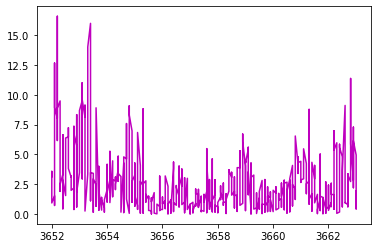

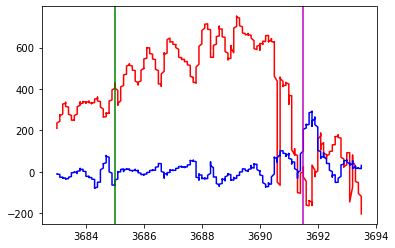

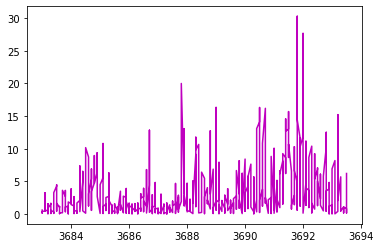

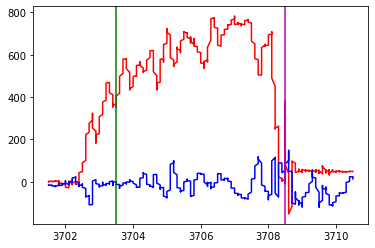

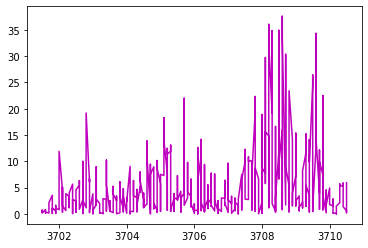

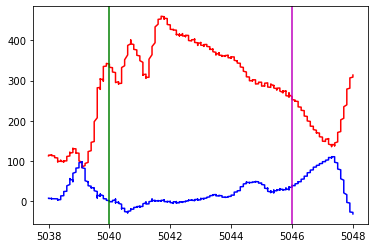

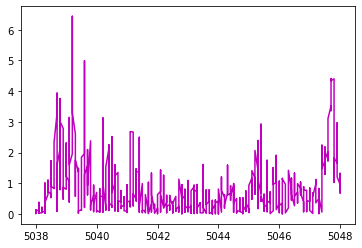

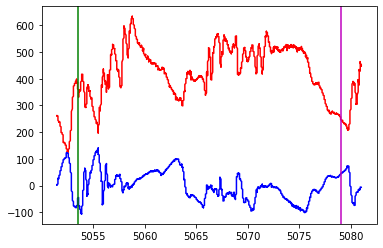

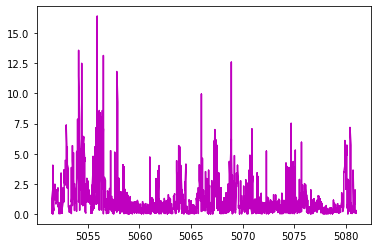

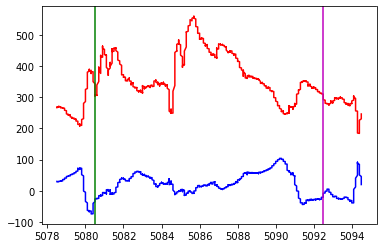

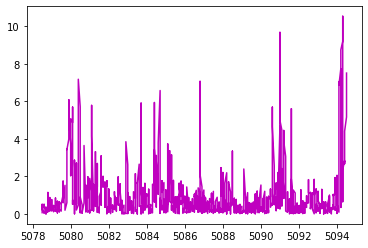

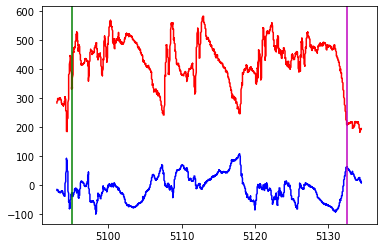

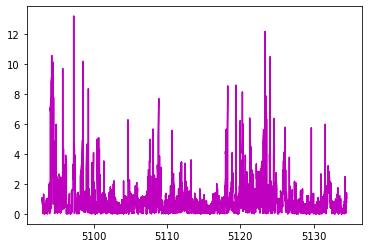

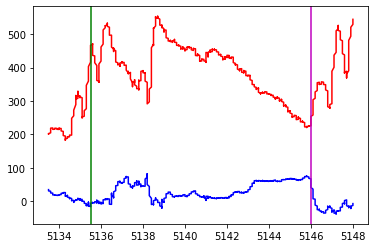

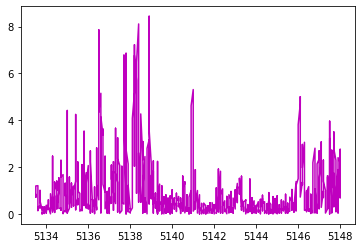

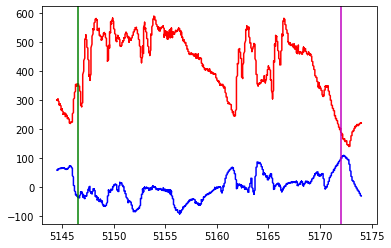

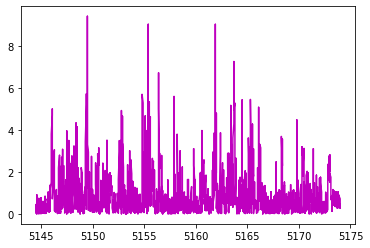

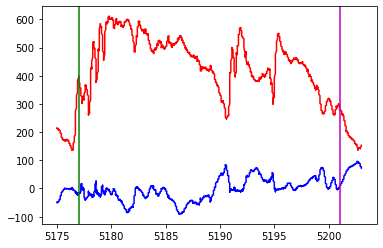

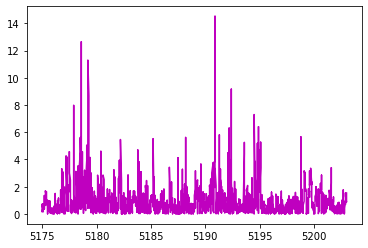

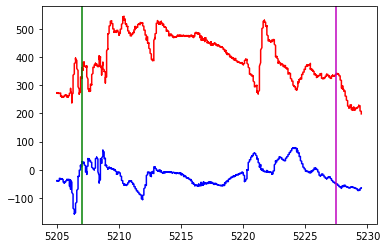

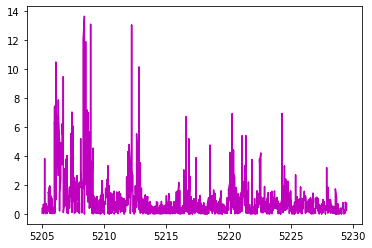

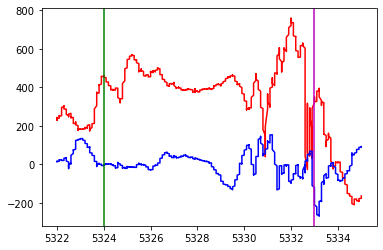

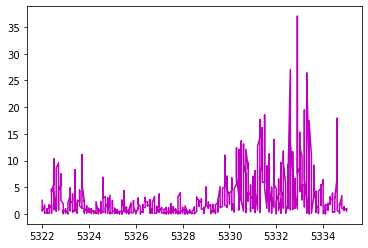

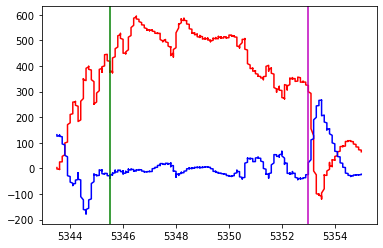

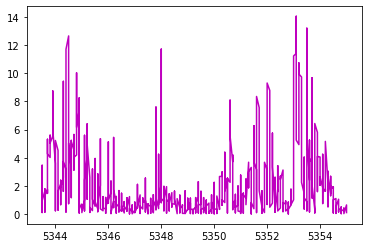

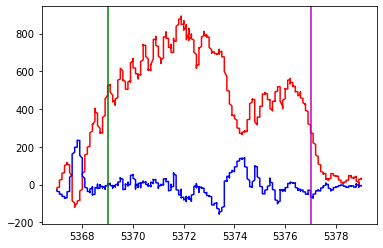

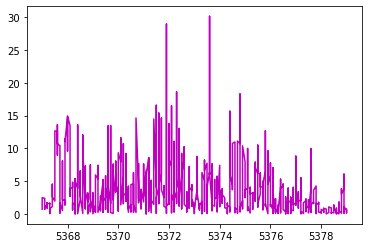

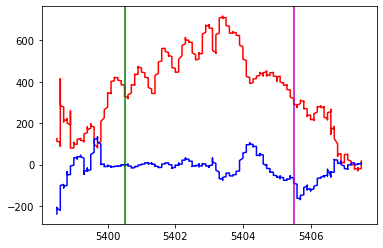

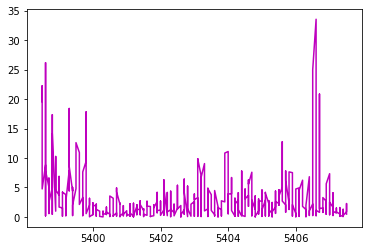

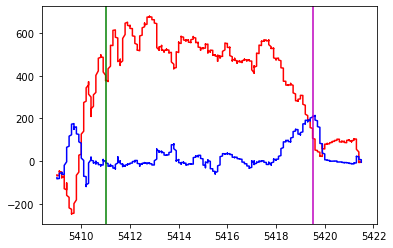

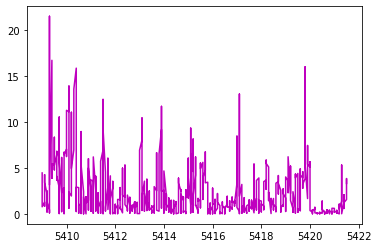

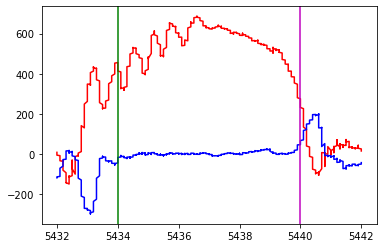

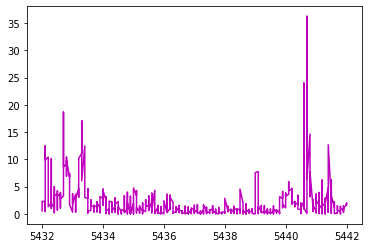

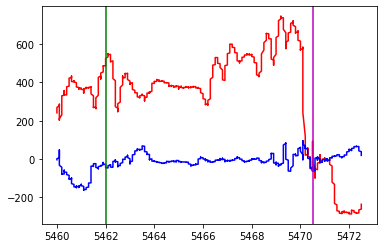

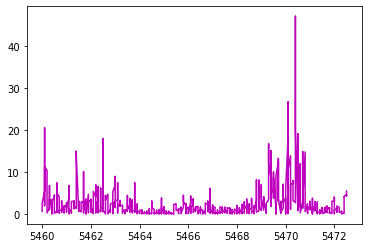

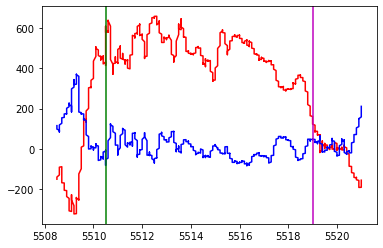

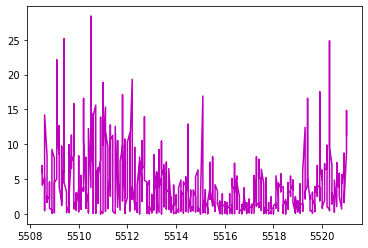

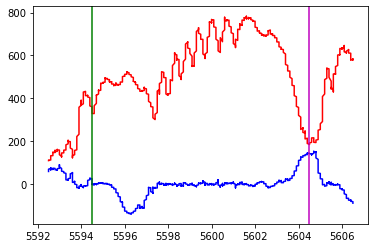

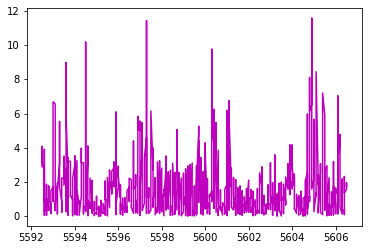

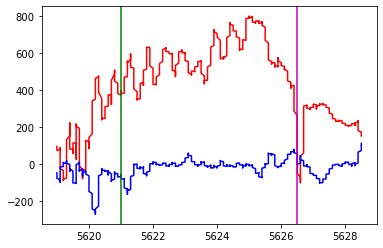

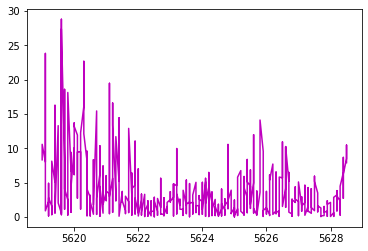

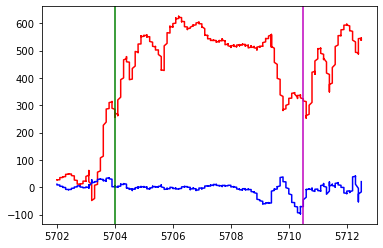

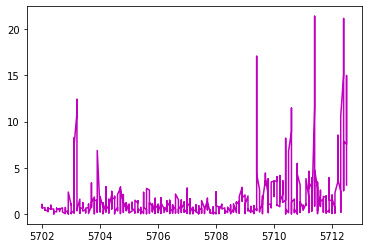

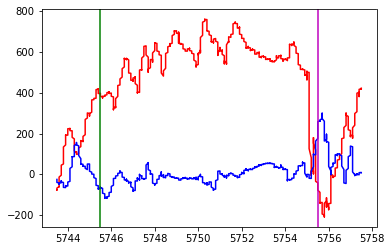

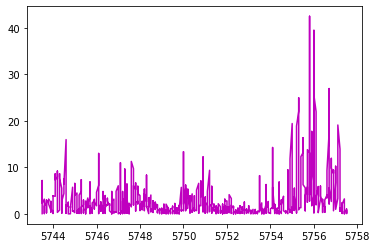

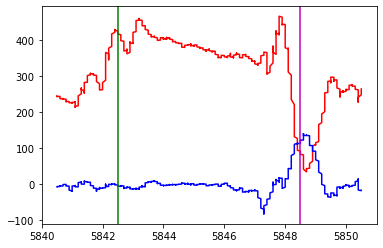

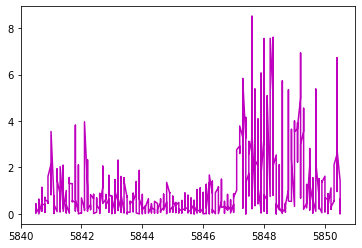

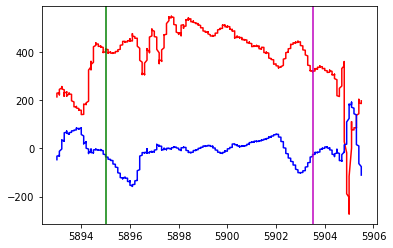

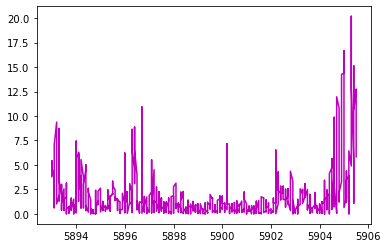

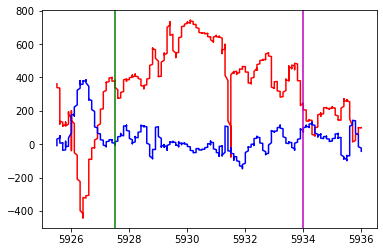

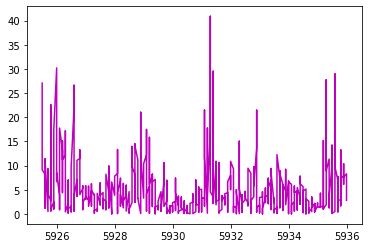

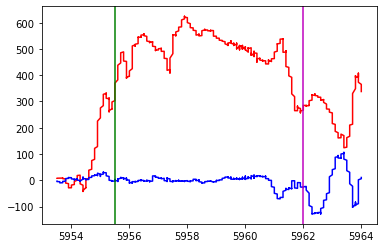

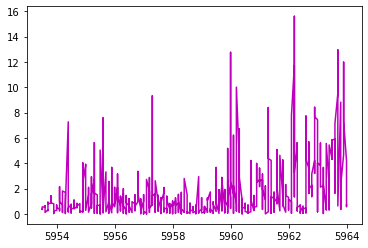

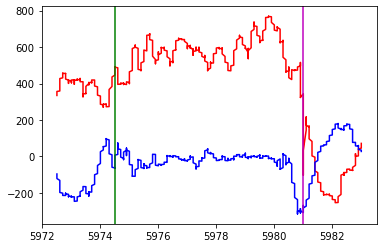

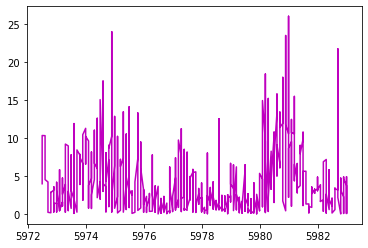

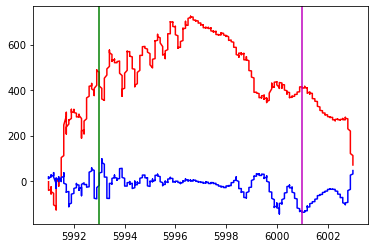

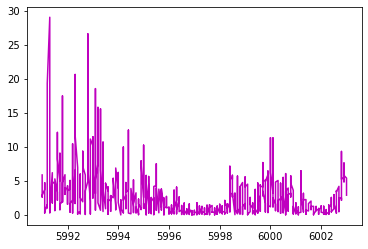

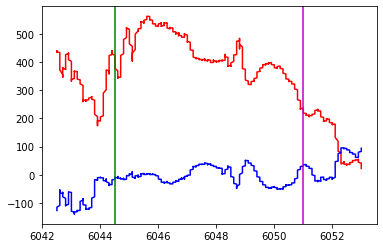

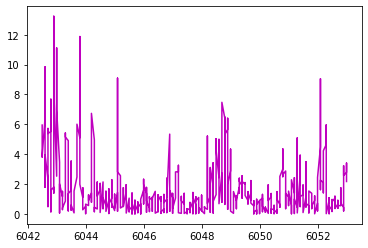

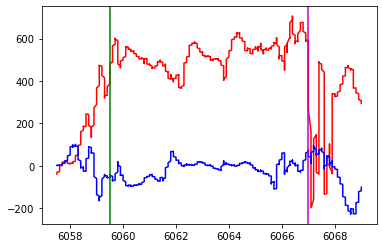

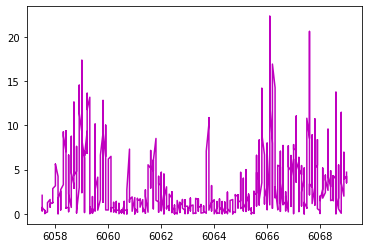

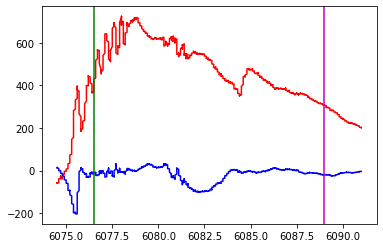

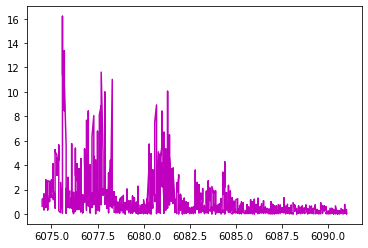

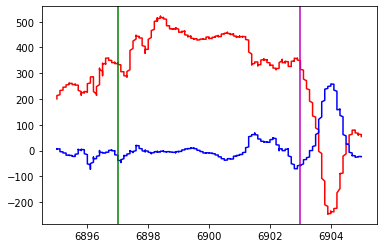

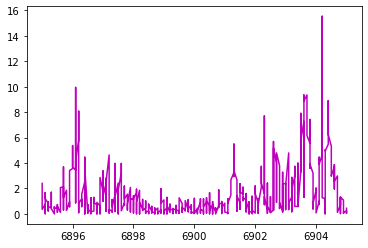

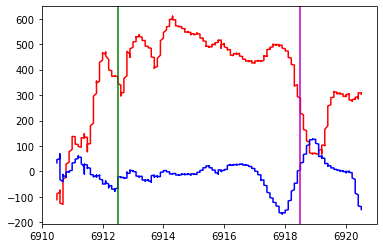

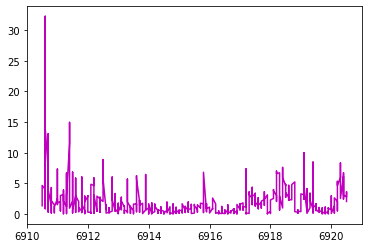

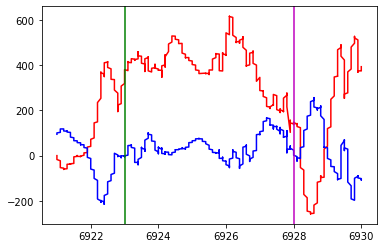

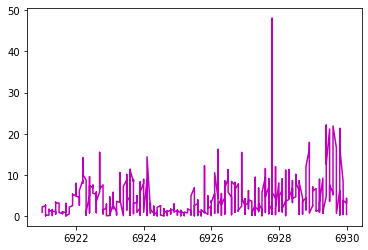

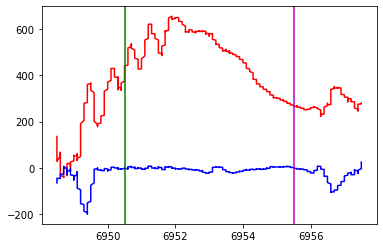

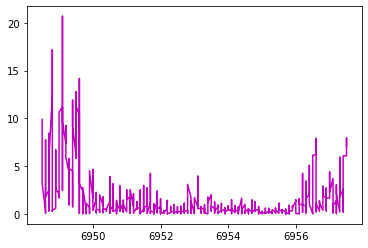

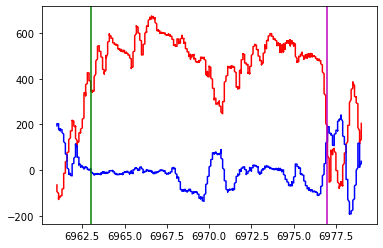

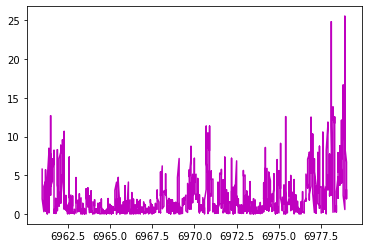

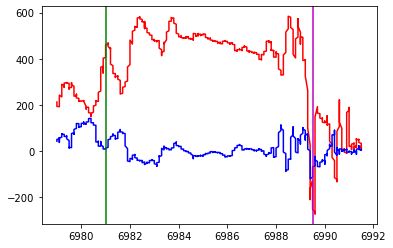

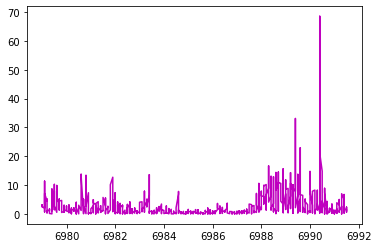

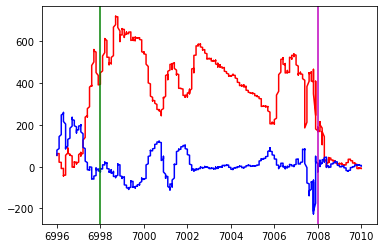

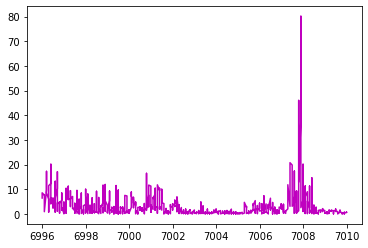

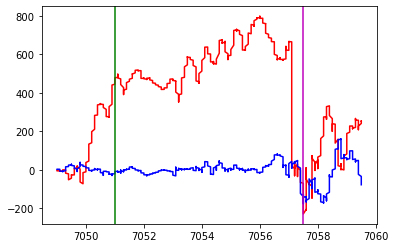

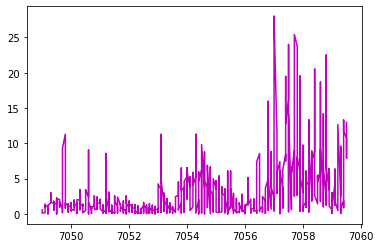

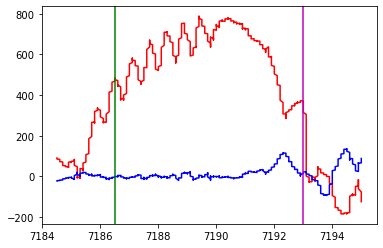

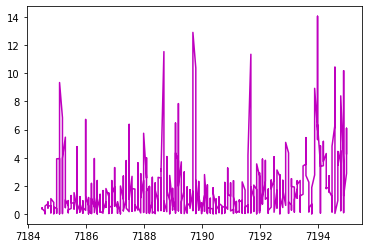

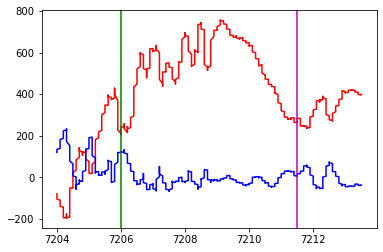

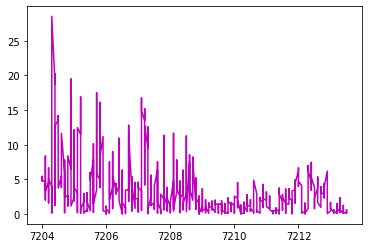

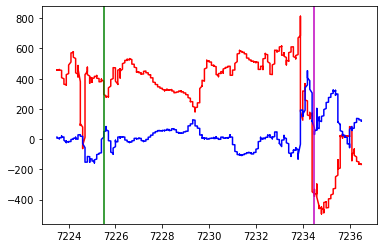

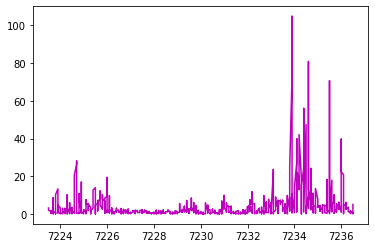

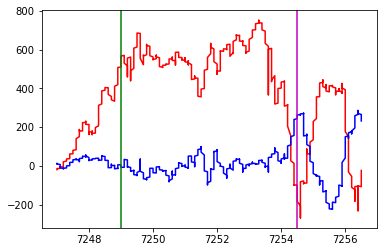

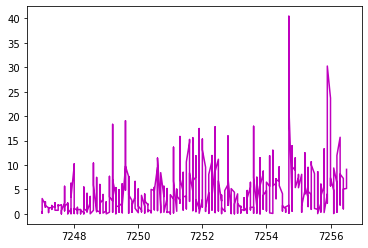

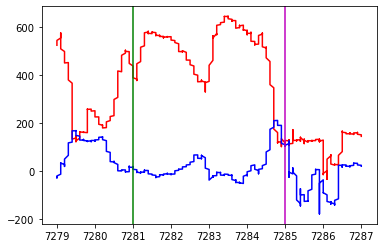

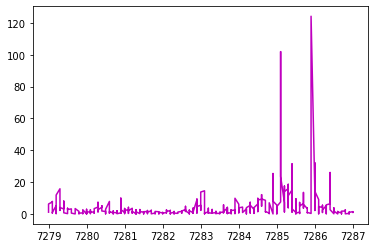

In [51]:
#Lowpass filter design for rotation and wheelspeed to improve accuracy of code (Butterworth filter)
df_Filter = df_Player
df_Filter = df_Filter.fillna(0)

Order = 5 
cutoff_freq = 1.5
sampling_freq = 100
sampling_duration = len(df_Filter.wheelRotationalSpeedX)/100

normalized_cutoff_freq = 2 * cutoff_freq / sampling_freq
numerator_coeffs, denominator_coeffs = signal.butter(Order, normalized_cutoff_freq)

filtered_WheelRotationspeed = signal.lfilter(numerator_coeffs, denominator_coeffs, df_Filter.wheelRotationalSpeedX)
filtered_FrameRotationspeed = signal.lfilter(numerator_coeffs, denominator_coeffs, df_Filter.frameRotationalSpeedZ)
    
#Play with different operations to see clearer patterns
Sub = filtered_WheelRotationspeed + filtered_FrameRotationspeed
Conv1 = filtered_FrameRotationspeed / filtered_WheelRotationspeed
Conv2 = (abs(filtered_FrameRotationspeed)+abs(filtered_WheelRotationspeed))/filtered_WheelRotationspeed
  
DiffFrame = np.diff(df_Filter.frameRotationalSpeedZ,n=1)
DiffFrame = np.insert(DiffFrame,0,0)
   
DiffWheel = np.diff(df_Filter.wheelRotationalSpeedX,n=1)
DiffWheel = np.insert(DiffWheel,0,0)
    
Multi = filtered_WheelRotationspeed + filtered_FrameRotationspeed
    
#Set all data into a datafram
Data = pd.DataFrame({'Time':df_Player.timeLine,'WheelRotationspeed':filtered_WheelRotationspeed,
                     'FrameRotationspeed':filtered_FrameRotationspeed,
                     'Sub':Sub ,'Conv':Conv1, 'DiffFrame':DiffFrame, 'DiffWheel':DiffWheel}, 
                     columns=['Time', 'WheelRotationspeed','FrameRotationspeed','Sub','Conv','DiffFrame','DiffWheel'])
    
#Convert data into chunks of n/100 of a second
n = 50  #chunk row size
Data_chunks = [Data[i:i+n] for i in range(0,Data.shape[0],n)]
    
#Search for the sprints
Startsprint = []
Stopsprint = []
Sprinting = False
Stop = True
 
#Use Sub en Conv to detect sprints
for chunks in Data_chunks:
    if abs(chunks['Conv'].max()) < 3 and chunks['Sub'].mean() > 300 and chunks['WheelRotationspeed'].min() > 200  and Sprinting == False:
        Startsprint.append(chunks['Time'].min())
        Sprinting = True
        Stop = False
    elif abs(chunks['Conv'].max() < 3) and chunks['Sub'].mean() > 300 and chunks['WheelRotationspeed'].min() > 200:
        Sprinting = True
        Stop = False
    elif Stop == False:
        Stopsprint.append(chunks['Time'].min())
        Sprinting = False
        Stop = True
    
#Use wheelrotation, framerotation and conv to detect rotations
Startrotate = []
Stoprotate = []
Rotate = False
Stop = True
    
for chunks in Data_chunks:
    if abs(chunks['FrameRotationspeed'].max()) > 75 and abs(chunks['DiffFrame'].max()) > 4 and Rotate == False:
        Startrotate.append(chunks['Time'].min())
        Rotate = True
        Stop = False
    elif abs(chunks['FrameRotationspeed'].max()) > 75 and abs(chunks['DiffFrame'].max()) > 4:
        Rotate = True
        Stop = False
    elif Stop == False:
        Stoprotate.append(chunks['Time'].min())
        Rotate = False
        Stop = True

#Filter Sprints by lenght, if length is below 2 delete sprint
Deleted = 0
  
if len(Startsprint) > len(Stopsprint):
    Startsprint.pop(-1)
    
if len(Startsprint) == len(Stopsprint):
    for i in range(0,len(Startsprint)-1):
        if (Stopsprint[i-Deleted] - Startsprint[i-Deleted]) < 5:
            Startsprint.pop(i-Deleted)
            Stopsprint.pop(i-Deleted)
            Deleted = Deleted + 1

print(Startsprint, Stopsprint)
print(len(Startsprint))
            
#Plot graph
for i in range(0,len(Startsprint),1):
    plt.plot(df_Player.timeLine.iloc[int(Startsprint[i]*100-200):int(Stopsprint[i]*100+200)],
             df_Player.wheelRotationalSpeedX.iloc[int(Startsprint[i]*100-200):int(Stopsprint[i]*100+200)],'r',
             df_Player.timeLine.iloc[int(Startsprint[i]*100-200):int(Stopsprint[i]*100+200)],
             df_Player.frameRotationalSpeedZ.iloc[int(Startsprint[i]*100-200):int(Stopsprint[i]*100+200)],'b'
            )
    plt.axvline(x=Startsprint[i],color = 'g')
    plt.axvline(x=Stopsprint[i], color = 'm')
    plt.show()
    plt.plot(df_Player.timeLine.iloc[int(Startsprint[i]*100-200):int(Stopsprint[i]*100+200)],
             abs(Data.DiffFrame.iloc[int(Startsprint[i]*100-200):int(Stopsprint[i]*100+200)]),'m'
            )
    plt.show()

In [52]:
Starting =[]
Stopping = []

df_Filter = df_Player
df_Filter = df_Filter.fillna(0)

Order = 5 
cutoff_freq = 1.5
sampling_freq = 100
sampling_duration = len(df_Filter.wheelRotationalSpeedX)/100

  
normalized_cutoff_freq = 2 * cutoff_freq / sampling_freq
numerator_coeffs, denominator_coeffs = signal.butter(Order, normalized_cutoff_freq)

filtered_WheelRotationspeedX = signal.lfilter(numerator_coeffs, denominator_coeffs, df_Filter.wheelRotationalSpeedX)
filtered_FrameRotationspeedZ = signal.lfilter(numerator_coeffs, denominator_coeffs, df_Filter.frameRotationalSpeedZ)


df_Player['Sum_WheelX_FrameZ']  = df_Player.wheelRotationalSpeedX + df_Player.frameRotationalSpeedZ
df_Player['Div_FrameZ_WheelX']  = df_Player.frameRotationalSpeedZ / df_Player.wheelRotationalSpeedX
df_Player['Filt_WheelX'] = filtered_WheelRotationspeedX
df_Player['Filt_FrameZ'] = filtered_FrameRotationspeedZ

print(Startsprint, Stopsprint)

df_Player['Action'] = ""

for i  in range(0,len(Startsprint)):
    df_Player['Action'].iloc[int(Startsprint[i]*100):int(Stopsprint[i]*100)] = 1
   
        
df_Player.to_csv('matrix_Player_' + str(Player) + '_game_' + str(Game) + '_All_Action.csv')


[997.01, 1019.0, 1041.5, 1062.5, 1078.0, 1086.0, 1093.5, 1105.5, 1138.0, 1161.0, 1181.5, 1201.0, 1232.5, 1248.5, 1257.0, 1427.5, 1485.5, 1511.5, 1538.0, 1566.0, 1593.0, 1626.5, 1659.5, 1676.0, 1734.0, 1832.0, 1912.0, 2216.5, 2224.5, 2235.5, 2433.5, 2465.5, 2490.0, 2558.0, 2598.0, 2631.0, 2647.0, 2671.5, 2684.0, 2786.0, 2800.0, 2850.0, 2873.0, 2888.5, 2940.0, 2956.5, 3004.5, 3025.5, 3049.0, 3074.0, 3093.5, 3118.5, 3137.5, 3156.0, 3256.0, 3276.0, 3329.5, 3372.0, 3506.5, 3530.0, 3555.5, 3602.5, 3628.0, 3654.0, 3685.0, 3703.5, 5040.0, 5053.5, 5080.5, 5095.0, 5135.5, 5146.5, 5177.0, 5207.0, 5324.0, 5345.5, 5369.0, 5400.5, 5411.0, 5434.0, 5462.0, 5510.5, 5594.5, 5621.0, 5704.0, 5745.5, 5842.5, 5895.0, 5927.5, 5955.5, 5974.5, 5993.0, 6044.5, 6059.5, 6076.5, 6897.0, 6912.5, 6923.0, 6950.5, 6963.0, 6981.0, 6998.0, 7051.0, 7186.5, 7206.0, 7225.5, 7249.0, 7281.0] [1008.0, 1041.0, 1047.0, 1074.0, 1083.5, 1093.0, 1103.0, 1121.0, 1148.5, 1181.0, 1186.5, 1219.5, 1246.0, 1254.0, 1262.0, 1433.5, 1490.5

/opt/jupyterhub/anaconda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
